<a href="https://colab.research.google.com/github/yabbou/Career_Forecasting/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Career Forecasting**


Introduction
==

**Abstract**

**250 words or less

**General Introduction**

**Describe your project, including the scientific or business motivation for the research
question you have chosen to answer. This section should summarize the content of your Final Project Proposal,
so be sure to explain your research question, describe the source and content of the data set you have chosen to
work with, and summarize your approach to meeting the requirements for the Project

*Research Question*: ...

_Variables_:...

The data set includes ...:
1. 


**Research Approach**

**Explain + present the end-to-end methodology you made use of for all
aspects of your Final Project work, including your EDA, data preparation, and investigative analysis work.
Be sure to include a description of your data management strategy as part of your narrative.


**Summary:**

Step 1: Introduction

Step 2: EDA

Step 3: Data Preparation

Step 4: Regression Predictions

Step 5: Conclusion

Part 2: EDA
==

Here are some of the data tables that will be analysed:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from yellowbrick.classifier import ROCAUC

import warnings
warnings.filterwarnings("ignore")

def displayRows(df):
  rows = df.shape[0]
  print('Rows:',rows)

employed_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employed_usa_2006_2015.csv").iloc[:-2,:]
displayRows(employed_df)
employed_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Rows: 28


,Occupation,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,All occupations,"144,427","146,047","145,362","139,877","139,064","139,869","142,469","143,929","146,305","148,834"
1,"Management, professional, and related occupations","50,420","51,787","52,761","52,219","51,743","52,546","54,043","54,711","56,050","57,960"
2,"Management, business, and financial operations...","21,233","21,577","22,059","21,529","20,938","21,589","22,678","22,794","23,171","24,108"
3,Professional and related occupations,"29,187","30,210","30,702","30,690","30,805","30,957","31,365","31,917","32,879","33,852"
4,Architect,221,240,233,204,184,181,195,193,178,203


In [ ]:
employed_college_students_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employment_college_students_2010_2012.csv")
employed_college_students_df = employed_college_students_df.drop(['Major_code','Sample_size'],axis='columns') #Major_code was relevant when retrieving the data from original source 
displayRows(employed_college_students_df)
employed_college_students_df.head()

Rows: 173


,Rank,Major,Major_category,Total,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Are there any null values for which to account?



In [ ]:
def displayNulls(df):
  nulls = df[df.isnull().sum()]
  print(nulls,'\n')

def displayNullCount(df):
  null_count = df.isnull().sum()
  print(null_count[df.isnull().sum() > 0],'\n')

employed_students_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employment_all_students_2010_2012.csv")
employed_students_df = employed_students_df.drop(['Major_code'],axis='columns') 

employed_graduate_students_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employment_graduate_school_students_2010_2012.csv")
employed_graduate_students_df = employed_graduate_students_df.drop(['Major_code'],axis='columns') 


displayNullCount(employed_df)
displayNullCount(employed_students_df)
displayNullCount(employed_college_students_df)
displayNullCount(employed_graduate_students_df)


Series([], dtype: int64) 

Series([], dtype: int64) 

Unemployment_rate    1
dtype: int64 

Series([], dtype: int64) 



Thankfully, most of the data cleaning was performed before uploaded to the public domain. But there indeed remains a single null value in the `employed_college_students_df` table.

In [ ]:
def displayNullRow(df):
  return df[df.isnull().any(axis=1)]

displayNullRow(employed_college_students_df)

,Rank,Major,Major_category,Total,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,124,1756,1323,0.429685,0,111,0,111,0,NaN,40000,40000,40000,0,0,0


The last row holds an unknown `Unemployment_rate`. Though, the `Unemployed` column has a value of 0, so the rate could be deduced to also be 0.

In [ ]:
employed_college_students_df = employed_college_students_df.replace(np.NAN,0) 
displayNullCount(employed_college_students_df)

Series([], dtype: int64) 



Here are the unique values:

In [ ]:
def displayUnique(df):
  COLS = df.columns
  for x in range(COLS.shape[0]):
    print(COLS[x])
    print(np.unique(df.iloc[:,x].sort_values(ascending=False)),'\n')

displayUnique(employed_df)

Occupation
['All occupations' 'Architect' 'Biological or life scientist' 'Chemist'
 'Dietitian' 'Economist and market and survey researcher' 'Engineer'
 'Engineering and related technologist or technician'
 'Health technologist or technician' 'Lawyer or judge'
 'Management, business, and financial operations occupations'
 'Management, professional, and related occupations'
 'Mathematical or computer scientist' 'Other health care professional'
 'Other natural scientist' 'Other occupations'
 'Other professional or related occupation'
 'Other social scientist or urban planner' 'Pharmacist' 'Physician'
 "Physicians' assistant" 'Professional and related occupations'
 'Psychologist' 'Registered nurse' 'Science technician'
 'Teacher, except postsecondary (college and university)'
 'Teacher, postsecondary (college and university)' 'Therapist'] 

2006
['1,031' '1,194' '1,887' '116' '144,427' '159' '189' '2,219' '2,529'
 '21,233' '221' '243' '245' '29,187' '3,209' '308' '354' '414' '5,595'
 '50,

In [ ]:
displayUnique(employed_students_df)

Major
['ACCOUNTING' 'ACTUARIAL SCIENCE' 'ADVERTISING AND PUBLIC RELATIONS'
 'AEROSPACE ENGINEERING' 'AGRICULTURAL ECONOMICS'
 'AGRICULTURE PRODUCTION AND MANAGEMENT' 'ANIMAL SCIENCES'
 'ANTHROPOLOGY AND ARCHEOLOGY' 'APPLIED MATHEMATICS'
 'ARCHITECTURAL ENGINEERING' 'ARCHITECTURE'
 'AREA ETHNIC AND CIVILIZATION STUDIES' 'ART AND MUSIC EDUCATION'
 'ART HISTORY AND CRITICISM' 'ASTRONOMY AND ASTROPHYSICS'
 'ATMOSPHERIC SCIENCES AND METEOROLOGY' 'BIOCHEMICAL SCIENCES'
 'BIOLOGICAL ENGINEERING' 'BIOLOGY' 'BIOMEDICAL ENGINEERING' 'BOTANY'
 'BUSINESS ECONOMICS' 'BUSINESS MANAGEMENT AND ADMINISTRATION'
 'CHEMICAL ENGINEERING' 'CHEMISTRY' 'CIVIL ENGINEERING'
 'CLINICAL PSYCHOLOGY' 'COGNITIVE SCIENCE AND BIOPSYCHOLOGY'
 'COMMERCIAL ART AND GRAPHIC DESIGN'
 'COMMUNICATION DISORDERS SCIENCES AND SERVICES'
 'COMMUNICATION TECHNOLOGIES' 'COMMUNICATIONS'
 'COMMUNITY AND PUBLIC HEALTH' 'COMPOSITION AND RHETORIC'
 'COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY'
 'COMPUTER AND INFORMATION SYSTEMS' 'COM

Though, the `employed_df` appears to only hold object types (even for its numeric data). The data will now be converted so it could be more easily analysed.

In [ ]:
SHOULD_BE_NUMERIC_COLS = range(2006,2015+1)
SHOULD_BE_NUMERIC_COLS = [str(col) for col in SHOULD_BE_NUMERIC_COLS]

def convertStringValuesToIntegers(df,cols):
  for col in df[cols]:
    df[col] = [int(x.replace(',','')) for x in df[col]]
  return df

employed_df = convertStringValuesToIntegers(employed_df,SHOULD_BE_NUMERIC_COLS)

Great. Now let's see some general statistics:

In [ ]:
employed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
2006,28.0,13159.321429,32660.576309,65.0,237.50,768.0,3805.50,144427.0
2007,28.0,13360.392857,32994.748145,73.0,240.75,793.5,4046.50,146047.0
2008,28.0,13363.892857,32795.491137,75.0,239.75,780.0,4254.75,145362.0
2009,28.0,12952.250000,31508.283115,68.0,228.75,809.5,4087.75,139877.0
2010,28.0,12881.285714,31330.881507,79.0,237.25,800.5,4133.00,139064.0
2011,28.0,12973.142857,31494.094816,82.0,263.25,791.5,4178.75,139869.0
2012,28.0,13226.642857,32062.987122,92.0,276.25,837.0,4329.25,142469.0
2013,28.0,13374.464286,32388.486990,82.0,274.25,846.0,4466.50,143929.0
2014,28.0,13626.392857,32910.608067,69.0,293.00,918.0,4736.50,146305.0
2015,28.0,13910.000000,33454.270693,71.0,291.00,940.5,4826.00,148834.0


General fall and net rise in minimum (enrolled) and median/maximum (salaries).

Now the numeric columns in the more detialed `Dataframe`, which includes the unemployment data, alterantive education jobs, and many more majors:

In [ ]:
employed_students_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,173.0,230256.635838,422068.483149,2396.0,24280.000000,75791.000000,205763.000000,3.123510e+06
Employed,173.0,166161.982659,307324.399668,1492.0,17281.000000,56564.000000,142879.000000,2.354398e+06
Employed_full_time_year_round,173.0,126307.774566,242425.389073,1093.0,12722.000000,39613.000000,111025.000000,1.939384e+06
Unemployed,173.0,9725.034682,18022.040192,0.0,1101.000000,3619.000000,8862.000000,1.472610e+05
Unemployment_rate,173.0,0.057355,0.019177,0.0,0.046261,0.054719,0.069043,1.561475e-01
Median,173.0,56816.184971,14706.226865,35000.0,46000.000000,53000.000000,65000.000000,1.250000e+05
P25th,173.0,38697.109827,9414.524761,24900.0,32000.000000,36000.000000,42000.000000,7.800000e+04
P75th,173.0,82506.358382,20805.330126,45800.0,70000.000000,80000.000000,95000.000000,2.100000e+05


>Note: 
>
>The **average** major enrollment is 75,000. **Minimum** 2,000. **Maximum** 3 million. 
>
>The **average** median salary is \$56,000 USD. **Minimum** $35,000. **Maximum** \$1,250,000. 
>
>The **average** 75th salary percentile is \$82,500 USD. **Minimum** \$46,000. **Maximum** \$2,100,000. 

(This dataset apparently has a much larger data pool.)

(Just curious, but the greatest `Unemployemnt` is above 140,000 persons! Which profession holds that statistic?) 

In [ ]:
condition = employed_students_df['Unemployed']==147261
employed_students_df.loc[condition]

,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
161,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,3123510,2354398,1939384,147261,0.058865,58000,39500,86000.0


A large value, but thankfully at least a much larger employment count--0.06% of the total gratuates of the major. 
>Note: this is the major with the most enrollments.

Here is a visual of the data:

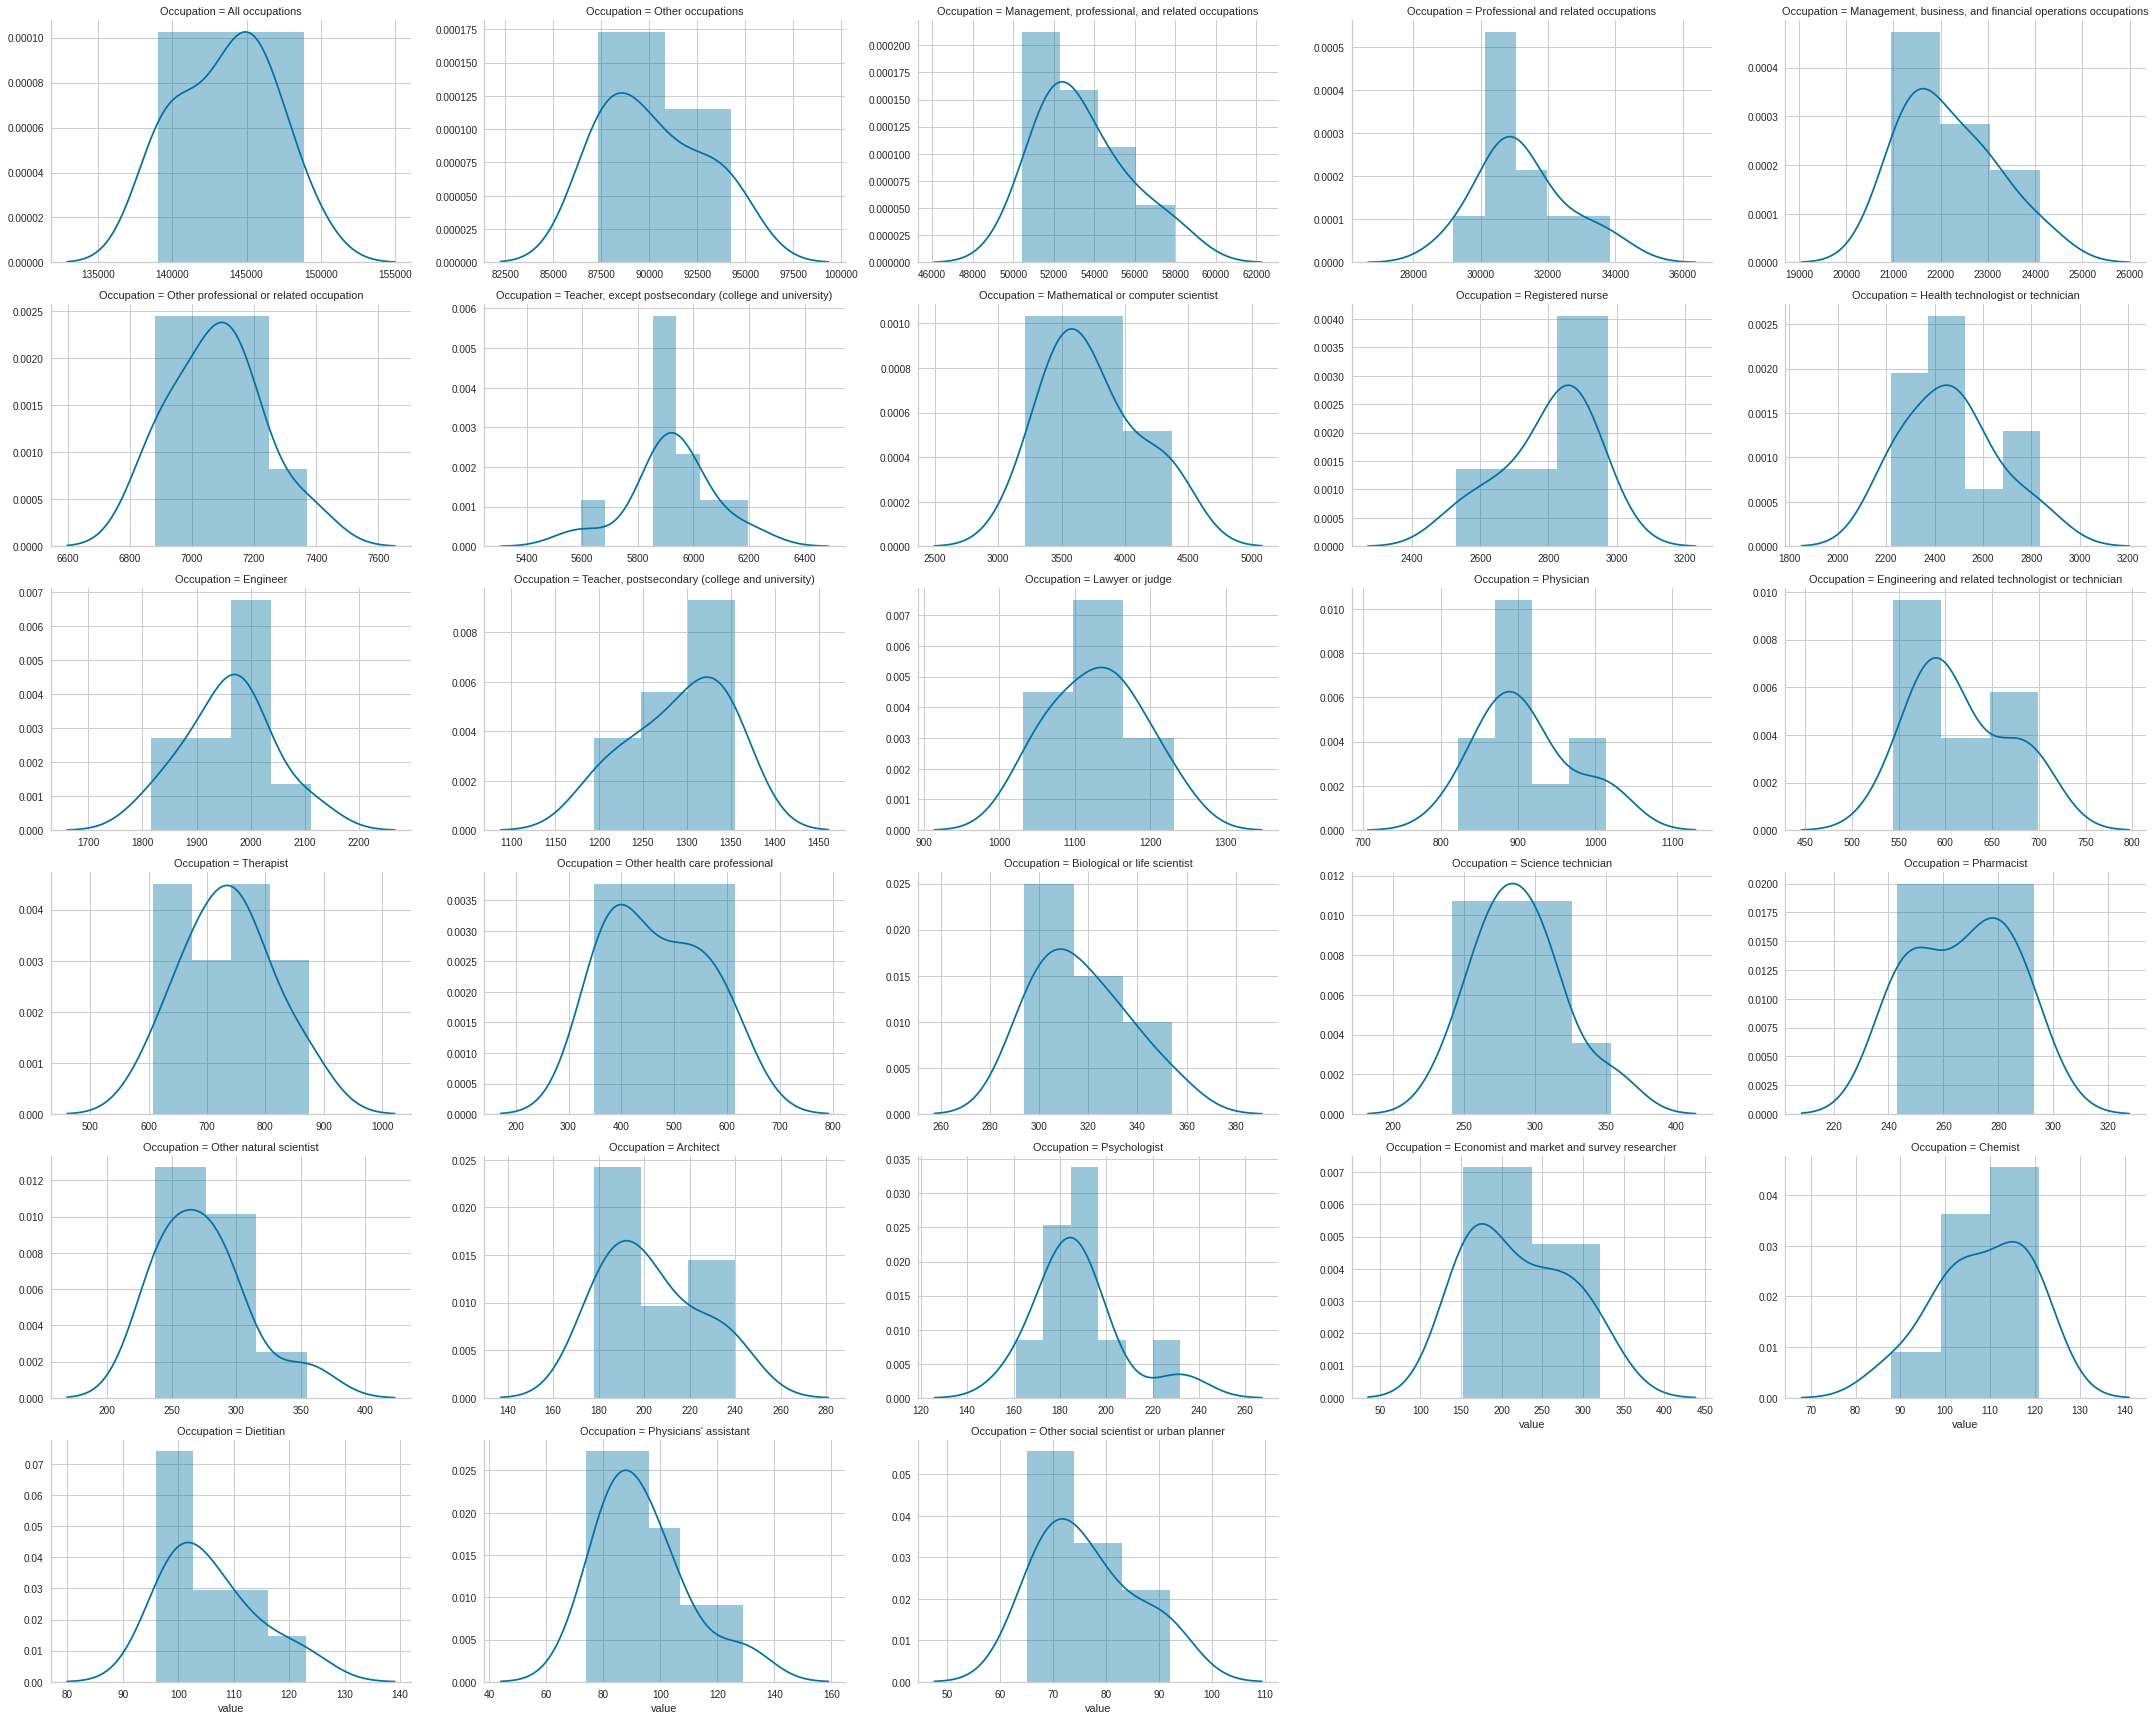

In [ ]:
employed_by_number_df = employed_df.iloc[:,:].sort_values(by='2006',ascending=False)
transposed = employed_by_number_df.iloc[:,1:].T
transposed.columns = employed_by_number_df.iloc[:,0]

nd = pd.melt(transposed)
numeric = sns.FacetGrid(nd, col='Occupation', col_wrap=5, sharex=False, sharey=False, height=4,aspect=1.5)
numeric.map(sns.distplot, 'value')

All of the columns contained data with relatively balanced general distribution. 

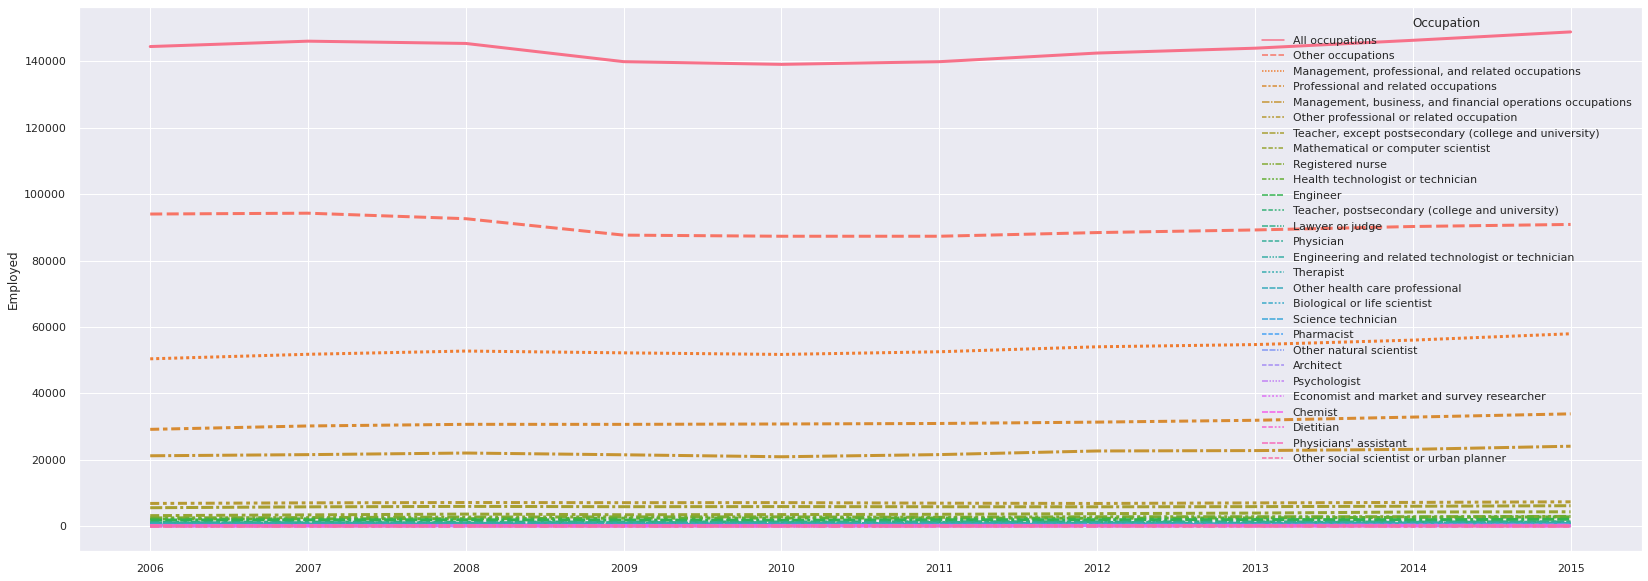

In [ ]:
sns.set(rc={"figure.figsize":(28, 10)})
sns.lineplot(data=transposed,linewidth=3)
plt.ylabel('Employed')
plt.show()

In [ ]:
employed_by_number_df.head(6)

,Occupation,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,All occupations,144427,146047,145362,139877,139064,139869,142469,143929,146305,148834
27,Other occupations,94007,94260,92601,87658,87321,87322,88426,89217,90255,90874
1,"Management, professional, and related occupations",50420,51787,52761,52219,51743,52546,54043,54711,56050,57960
3,Professional and related occupations,29187,30210,30702,30690,30805,30957,31365,31917,32879,33852
2,"Management, business, and financial operations...",21233,21577,22059,21529,20938,21589,22678,22794,23171,24108
26,Other professional or related occupation,6884,7060,7161,7111,7131,6964,6881,7045,7194,7370


In [ ]:
employed_by_number_df.tail(2)

,Occupation,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
16,Physicians' assistant,85,87,99,91,99,82,108,129,84,74
25,Other social scientist or urban planner,65,73,75,68,79,90,92,82,69,71


The professions maintain around the same employment; some dropped and rose, other slowly increased. The majority of jobs have between 7,000 and 70 employed. Besides for the top four overarching category occupations--managements, professional, business/finance, and "other" jobs-- no obvious outlying employed jobs are present. 

Now, here are the other employment variables:

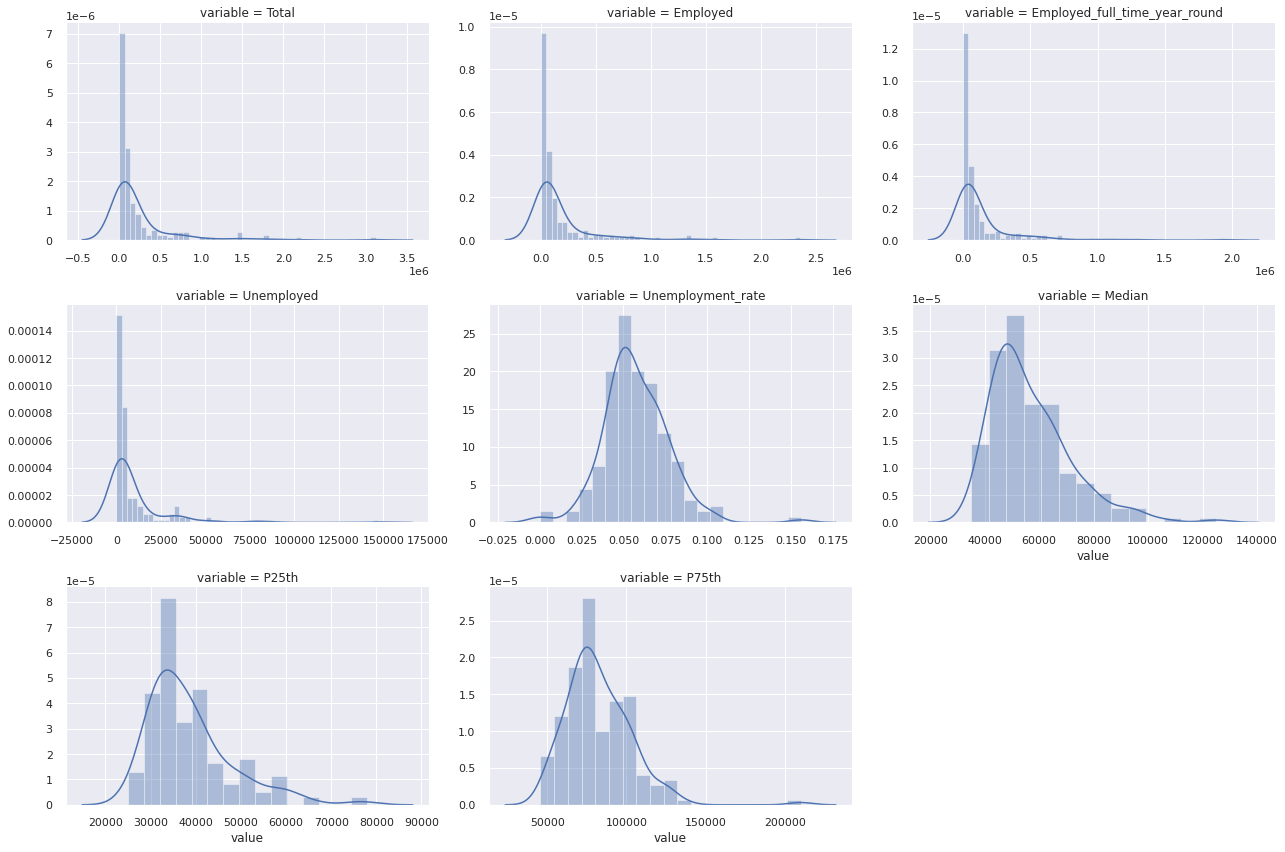

In [ ]:
nd = pd.melt(employed_students_df.iloc[:,2:])
numeric = sns.FacetGrid(nd, col='variable', col_wrap=3, sharex=False, sharey=False, height=4, aspect=1.5,)
numeric.map(sns.distplot, 'value')

They appear mostly balanced or right distributed.   

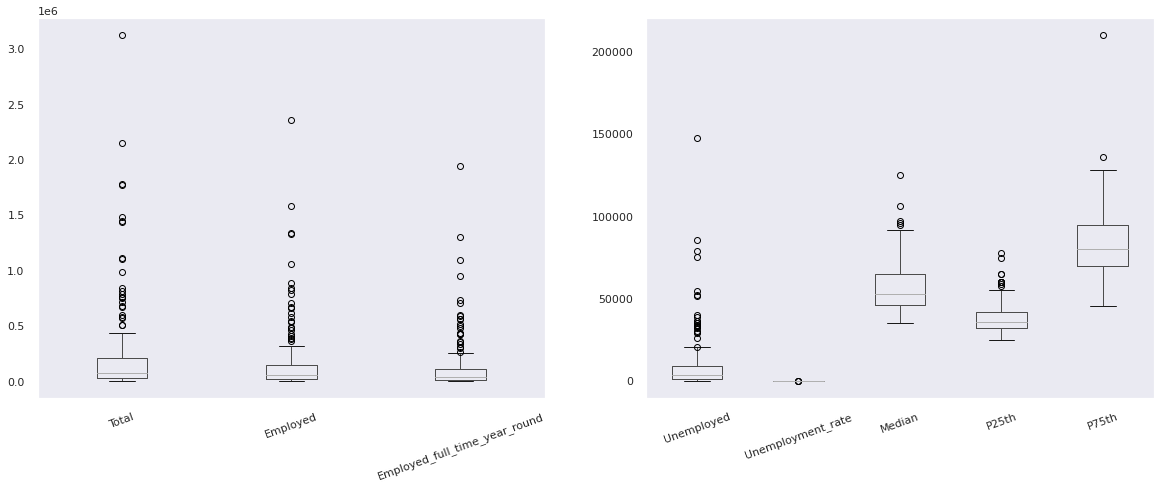

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
boxplot = employed_students_df.iloc[:,2:5].boxplot(grid=False, rot=20,figsize=(6,5))
plt.subplot(1,2,2)
boxplot = employed_students_df.iloc[:,5:].boxplot(grid=False, rot=20,figsize=(6,5))

As shown in the histograms above, the `total` students enrolled in a major, as well as the `employed` and `unemployed` students, contain several outliers (values that vear far from the average). 
> Note: this dataset appears to have jobs _with_ outlying numbers of employees, but perhpas due to the many more distinct career categories. 173 instead of 27, over five times more categories.

In [ ]:
def displayOutliers(col,col_index,min_threshold,desc):
  total_outliers = employed_students_df[employed_students_df[col]>min_threshold]
  print(f'{desc} outliers: {total_outliers.iloc[:,:].shape[0]} ({total_outliers.shape[0]/employed_students_df.shape[0]*100:.0f}%)')
  return total_outliers.iloc[:,:]

total_outliers = displayOutliers('Total',2,500_000,'Total enrolled') #minimum thresholds are approximate, based on the outlier charts
employed_outliers = displayOutliers('Employed',3,250_000,'Total employed')
unemployed_outliers = displayOutliers('Unemployed',5,25_000,'Total unemployed')

Total enrolled outliers: 24 (14%)
Total employed outliers: 29 (17%)
Total unemployed outliers: 22 (13%)


The outliers consist of about 15% of the data. Those students appear to choose professions that have relatively high enrollment, high expected employment and even high unemployment. Though, the high unemployment could hold in fact the same percentage of jobs as the other major, due to the increased employment. 

Let's check that.

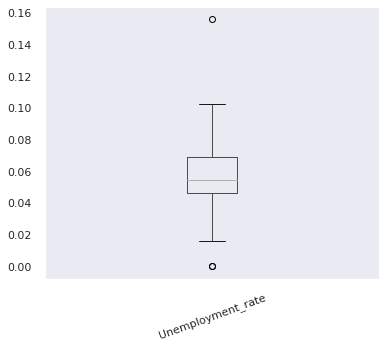

In [ ]:
col = 'Unemployment_rate'
boxplot = employed_students_df.loc[:,[col]].boxplot(grid=False, rot=20,figsize=(6,5))

In [ ]:
print(employed_students_df[employed_students_df[col]<.02])
print(employed_students_df[employed_students_df[col]>.14])

                                         Major  ...     P75th
26  EDUCATIONAL ADMINISTRATION AND SUPERVISION  ...   79000.0
51      GEOLOGICAL AND GEOPHYSICAL ENGINEERING  ...  125000.0
85                                PHARMACOLOGY  ...  105000.0

[3 rows x 10 columns]
                       Major Major_category  Total  ...  Median  P25th    P75th
146  MISCELLANEOUS FINE ARTS           Arts   8511  ...   45000  30000  60000.0

[1 rows x 10 columns]


>Note: There are no exceptionally lesser enrolled, lesser employed, nor lesser unemployed (in numbers) majors than the average.

Indeed, of the 173 jobs, 4 have exceptional unemployment rates. Thus the high student count, employment, and unemployment values remain relatively appropriate. 

Yet those majors still held higher enrollment.

In [ ]:
print('Total outliers:',[x for x in total_outliers.index])
print('Employed outliers:',[x for x in employed_outliers.index])
print('Unemployed outliers:', [x for x in unemployed_outliers.index])

Total outliers: [13, 20, 25, 28, 40, 48, 54, 73, 75, 78, 114, 121, 127, 132, 133, 138, 142, 153, 158, 159, 161, 164, 165, 171]
Employed outliers: [13, 14, 20, 25, 28, 40, 46, 48, 54, 73, 75, 78, 90, 100, 112, 114, 121, 127, 132, 133, 138, 142, 153, 158, 159, 161, 164, 165, 171]
Unemployed outliers: [13, 20, 25, 28, 48, 73, 75, 78, 114, 121, 127, 132, 133, 138, 142, 153, 158, 159, 161, 164, 165, 171]


In [ ]:
COL_INDECIES = [1,2,7]

total_outliers_indecies = np.union1d(total_outliers.index,employed_outliers.index)
total_outliers_indecies = np.union1d(total_outliers_indecies,unemployed_outliers.index)

print('All outliers:')
print(employed_students_df.iloc[total_outliers_indecies, COL_INDECIES].sort_values(by='Total',ascending=False),'\n')

xor_total_emp_outliers = np.setxor1d(employed_outliers.index,total_outliers.index)
xor_total_unemp_outliers = np.setxor1d(unemployed_outliers.index,total_outliers.index)
unique_outliers_indecies = np.union1d(xor_total_emp_outliers, xor_total_unemp_outliers)
unique_outliers_df = employed_students_df.iloc[unique_outliers_indecies,:].sort_values(by='Total',ascending=False)

print('Unique outliers:')
print(unique_outliers_df.iloc[:,COL_INDECIES],'\n')

All outliers:
                          Major_category    Total  Median
161                             Business  3123510   58000
158                             Business  2148712   60000
159                             Business  1779219   65000
153                               Health  1769892   62000
114             Psychology & Social Work  1484075   45000
28                             Education  1446701   40000
25                             Education  1438867   43000
164                             Business  1114624   56000
73             Humanities & Liberal Arts  1098647   50000
13           Communications & Journalism   987676   50000
78                Biology & Life Science   839454   51000
165                             Business   816548   65000
20               Computers & Mathematics   783292   78000
127                       Social Science   757616   69000
121                  Law & Public Policy   757141   50000
132                       Social Science   748956   58000


In [ ]:
unique_outliers_df.iloc[:,[1,2,3,5,6,7]]

,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median
54,Engineering,581529,422207,19360,0.043844,80000
40,Engineering,503080,359172,17986,0.047688,75000
90,Computers & Mathematics,432806,280902,15701,0.052936,66000
112,Physical Sciences,427953,308461,14613,0.045231,56000
14,Communications & Journalism,418104,314438,20754,0.061917,50000
46,Engineering,358593,262831,14823,0.053387,78000
100,Industrial Arts & Consumer Services,350409,286683,14108,0.046903,44000


Only 7 of the 173 majors (4%) are not fully consistent with the total enrolled, employed, and unemployed... but we will not drop them, as they hold a few `Engineering` majors, which may be helpful for predicting eventual future more desired jobs (according solely to personal prediction).

Here are the most common major categories among the top ten majors:

In [ ]:
def getTopEnrollment(rows):
  return employed_students_df.loc[:,:].sort_values(by='Total',ascending=False).iloc[rows,:]

def displayTopEnrollmentMajors(rows):
  COLUMNS = ['Major_category','Total','Median','P75th']

  top_enrolment_df = getTopEnrollment(rows)
  print(top_enrolment_df[COLUMNS[0]].value_counts(),'\n')
  print(top_enrolment_df.loc[:,COLUMNS],'\n')

  median_salary = np.median(top_enrolment_df.loc[:,[COLUMNS[2]]])
  median_75th = np.median(top_enrolment_df.loc[:,[COLUMNS[3]]])
  print('Median salary:', int(median_salary))
  print('Median 75th percentile salary:', int(median_75th))
  return top_enrolment_df
enrollment_top_11 = displayTopEnrollmentMajors(range(11))

Business                       4
Education                      2
Communications & Journalism    1
Health                         1
Humanities & Liberal Arts      1
Biology & Life Science         1
Psychology & Social Work       1
Name: Major_category, dtype: int64 

                  Major_category    Total  Median     P75th
161                     Business  3123510   58000   86000.0
158                     Business  2148712   60000   95000.0
159                     Business  1779219   65000  100000.0
153                       Health  1769892   62000   80000.0
114     Psychology & Social Work  1484075   45000   68000.0
28                     Education  1446701   40000   50000.0
25                     Education  1438867   43000   59000.0
164                     Business  1114624   56000   90000.0
73     Humanities & Liberal Arts  1098647   50000   75000.0
13   Communications & Journalism   987676   50000   80000.0
78        Biology & Life Science   839454   51000   80000.0 

Median sal

>Remember: The average **major enrollment** is 75,000. Minimum 2,000. Maximum 3 million. The average **median salary** is \$56,000 USD. Minimum \$35,000. Maximum $1,250,000. The average **75th salary percentile** is \$82,500 USD. Minimum \$46,000. Maximum \$2,100,000.

The highest enrollment majors have about (and sometimes slightly higher than) a median salary... but in fact a lower median salary and median 75th percentile _than when including the lesser enrolled majors!_ The more enrolled majors are thus not solely due to exceptionally high salaries.

The most common of the highest enrolled majors is `Business`. (One could  have expected `Engineering`, but those come later to be more common, starting around the top 20s (as demonstrated below). Apparently, students do not want or perhpas convince themselves that they are not mentally fit for 'the more analytical professions'.)

Does the second top ten have a different major group?

In [ ]:
enrollment_20_30 = displayTopEnrollmentMajors(range(20,31))

Engineering                            3
Arts                                   2
Industrial Arts & Consumer Services    2
Communications & Journalism            1
Physical Sciences                      1
Computers & Mathematics                1
Psychology & Social Work               1
Name: Major_category, dtype: int64 

                          Major_category   Total  Median     P75th
54                           Engineering  581529   80000  110000.0
138                                 Arts  571961   45000   70000.0
142                                 Arts  504657   46600   70000.0
40                           Engineering  503080   75000  100000.0
90               Computers & Mathematics  432806   66000  100000.0
112                    Physical Sciences  427953   56000   85000.0
14           Communications & Journalism  418104   50000   80000.0
70   Industrial Arts & Consumer Services  402038   40500   60000.0
46                           Engineering  358593   78000  105000.0
100  I

`Engineering` is the most common in this second group. Then `General\Industrial Arts`. Yet about the same below median salaries.

Do students enroll in majors based on employment? Let's check.

In [ ]:
def displayOutliersPerColumn(col,col_indicies,min_threshold):
  outliers = employed_students_df[employed_students_df[col]>min_threshold].iloc[:,col_indicies].sort_values(by=col,ascending=False) #these are the outliers and extraordinarily employed majors
  print(f'{col} outliers: {outliers.shape[0]}\n')
  print(outliers['Major_category'].value_counts())
  return outliers 

emp_outliers = displayOutliersPerColumn('Employed',[0,1,3],250_000)
top = getTopEnrollment(range(emp_outliers.shape[0]))
top_employed_not_top_enrolled_indecies = np.setdiff1d(emp_outliers.index, top.index)
top_enrolled_not_top_employed_indecies = np.setdiff1d(top.index, emp_outliers.index)

print('\nTop employed (but not top enrolled): indecies',top_employed_not_top_enrolled_indecies)
print('Top enrolled (but not top employed): indecies',top_enrolled_not_top_employed_indecies)

Employed outliers: 29

Business                               5
Engineering                            4
Social Science                         3
Humanities & Liberal Arts              3
Arts                                   2
Communications & Journalism            2
Education                              2
Computers & Mathematics                2
Health                                 1
Physical Sciences                      1
Law & Public Policy                    1
Industrial Arts & Consumer Services    1
Biology & Life Science                 1
Psychology & Social Work               1
Name: Major_category, dtype: int64

Top employed (but not top enrolled): indecies [100]
Top enrolled (but not top employed): indecies [70]


Wow, there is almost a complete overlap with employment and enrollment: the more enroll, apparently the more are employed. (And as we saw, percentage-wise there was not necessarily a dramatically higher unemployment rate.) 

`Business` majors again appear to have especially high employment, now noticeably followed by `Engineering`.

Part 3: Data Preparation
==

Here are the most enrolled major catgories, and some brief correlations:

In [2]:
employed_students_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employment_all_students_2010_2012.csv") # sperate init for part 3
employed_students_df = employed_students_df.drop(['Major_code'],axis='columns') 

employed_college_students_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employment_college_students_2010_2012.csv")
employed_college_students_df = employed_college_students_df.drop(['Major_code','Sample_size'],axis='columns').replace(np.NAN,0)  

def sortPivot(df, col):
  print(df.sort_values(by=col,ascending=False).loc[:,[col]],'\n')

pivot_sum = employed_students_df.pivot_table(index='Major_category',aggfunc='sum')
sortPivot(pivot_sum,'Total')
sortPivot(pivot_sum,'Employed')
sortPivot(pivot_sum,'Median')
sortPivot(pivot_sum,'Unemployment_rate')

                                       Total
Major_category                              
Business                             9858741
Education                            4700118
Humanities & Liberal Arts            3738335
Engineering                          3576013
Health                               2950859
Social Science                       2654125
Psychology & Social Work             1987278
Arts                                 1805865
Communications & Journalism          1803822
Computers & Mathematics              1781378
Biology & Life Science               1338186
Industrial Arts & Consumer Services  1033798
Physical Sciences                    1025318
Law & Public Policy                   902926
Agriculture & Natural Resources       632437
Interdisciplinary                      45199 

                                     Employed
Major_category                               
Business                              7529851
Education                             2833199
Engi

`Employed` appears to very closely follow total enrollment, with a noticeable slight exception of `Engineering` above `Humanities & Liberal Arts` in employment but lower in enrollment. `Engineering` also rises to the top of the `Median` salaries, along with `Computers & Mathematics` and
`Biology & Life Science` not too far behind, yet lower on student enrollment. 

Though the `Unemployment_rate` is not as linearly related; perhpas a heatmap could help note the general relationship to `Median` and `Total`. 

Which columns are unnecessary or correlate to other columns, and could be removed? 

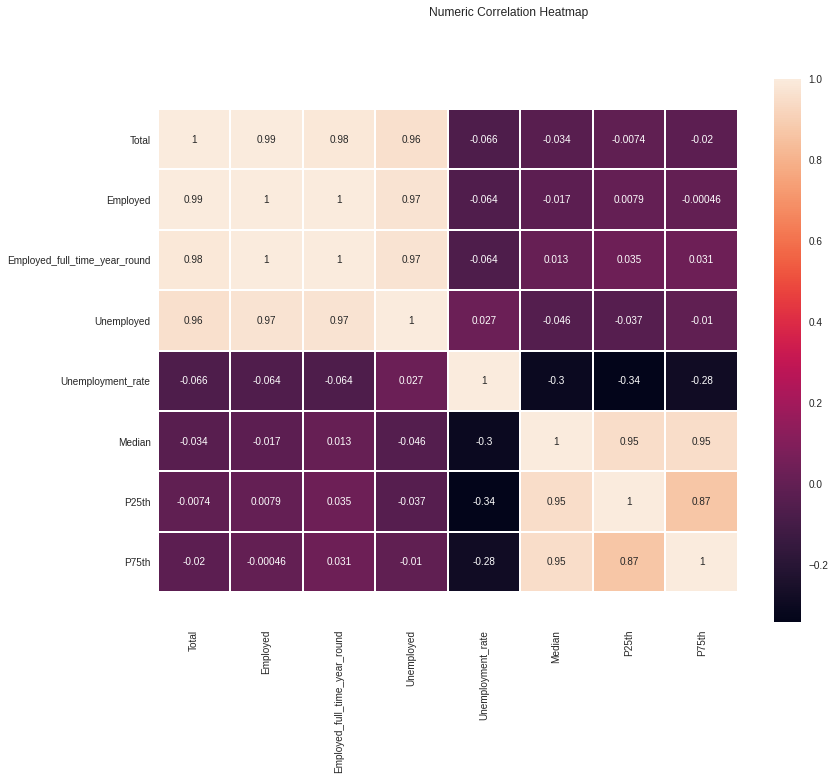

In [3]:
backup_all_students = employed_students_df.copy()
backup_college_students = employed_college_students_df.copy()

def displayHeatmap(df,numeric_index_start):
  fig = plt.figure(figsize=(13, 10)) 

  numeric_students_df = df.iloc[:,numeric_index_start:]
  corr = numeric_students_df.corr()
  sns.heatmap(corr, linewidth=1,annot=True,annot_kws={'size':10})

  b, t = plt.ylim()
  b += 0.5 
  t -= 0.5 
  plt.ylim(b, t) 
  fig.suptitle('Numeric Correlation Heatmap')   
  plt.show()
  
displayHeatmap(employed_students_df,2)

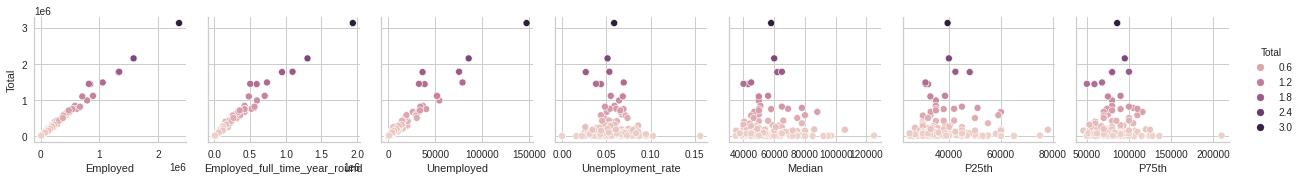

In [4]:
ENROLLED = 'Total'
sns.pairplot(employed_students_df.iloc[:,1:], hue=ENROLLED, y_vars=ENROLLED)
plt.show()

`Employed`, `Employed_full_time_year_round`, and `Unemployed` are all tremendously correlated to high enrollment! All above 95%. 

`P25th` is the least correlated to high enrollment, all the salary columns in fact with negative correlations to enrollment. According to the heatmap, the `Unemployment_rate` has a mostly inverse relation to `Total` enrollment and `Medain` salary. (Even though the pivot table above displayed that `Engineering` held the highest pay and yet the (relatively) highest `Unemployment_rate`).

Though, `Employed_full_time_year_round` is 100% correlated to `Employed`, so it could be deleted. `Unemployed` is also mostly identiacal in correlation. Same with `Median` and `P25th`, so the latter will be removed.

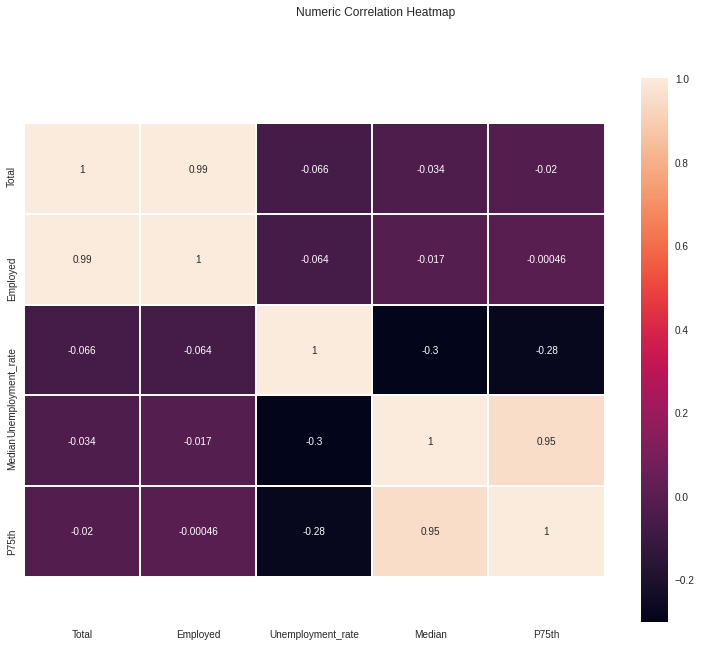

In [5]:
employed_students_reduced_cols_df = employed_students_df.copy()
employed_students_reduced_cols_df.drop(columns=['Employed_full_time_year_round','Unemployed','P25th'], inplace=True)

displayHeatmap(employed_students_reduced_cols_df,0)

Though, perhaps more factors could help predict high enrollment. 

Let's try the second dataset, which focuses only on college gradutes.

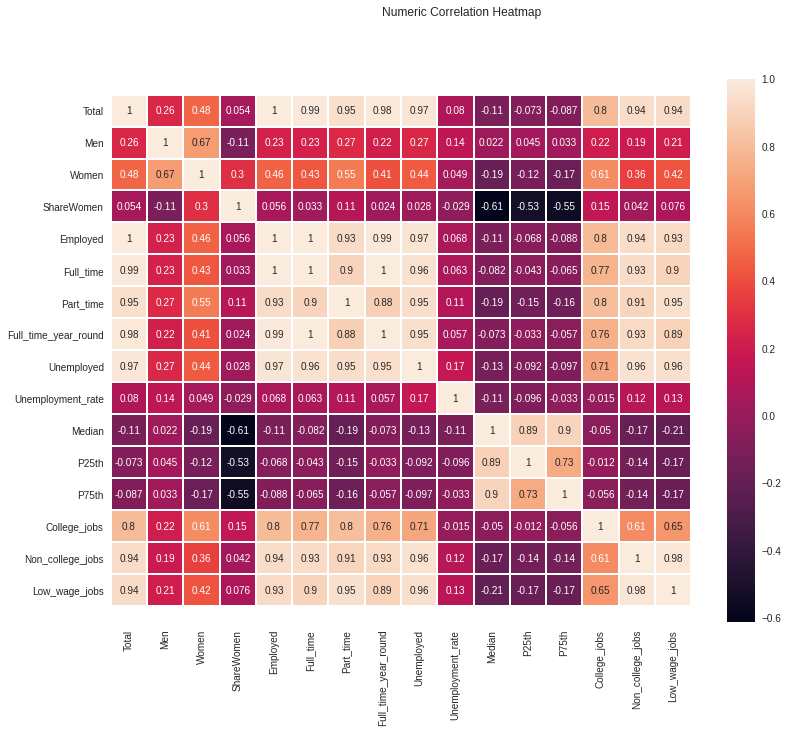

In [6]:
displayHeatmap(employed_college_students_df,3)  

The final three columns (`College jobs`, `Non_college_jobs`, and `Low_wage_jobs`) also have high correlation to enrollment. (That said, also fairly high correlation to the employment variables we already are using.) And the salary columns have risen in correlation as well!

Here is a more linear visual of the correlations, according to the Pearson algorithm:

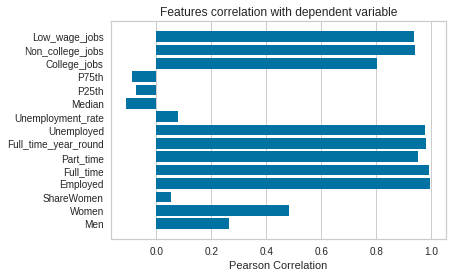

In [7]:
from yellowbrick.target import FeatureCorrelation

numeric_college_df = employed_college_students_df.iloc[:,3:]
target = numeric_college_df['Total']
features = numeric_college_df.drop('Total',axis=1).copy()
feature_names = list(features.columns)

visualizer = FeatureCorrelation(labels=feature_names,method='pearson')
visualizer.fit(features,target)
visualizer.poof()

Most columns are highly related! Perhaps the feature selection will intentioanlly exclude some of the higher correlating columns.

Let's test this dataset. Now to select the best features.

In [8]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [9]:
X = employed_college_students_df.iloc[:,4:].copy() #the numeric columns, less the target column
y = employed_college_students_df.iloc[:,3].copy() #the target column, 'Total'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

X_train.head()

,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
101,2682,26057,0.906677,14643,10732,6541,7588,1088,0.069163,35000,20000,50000,6587,6894,2237
158,404,1084,0.728495,24202,18079,8767,13944,1617,0.062628,29000,22000,38000,9927,12037,3304
98,23736,48883,0.673143,45326,38815,10948,30932,3305,0.067961,35000,27000,47000,9659,23059,7214
61,4419,371,0.077453,11581,9441,4590,6183,1067,0.084361,40000,29000,47000,7225,3145,1168
24,13496,5217,0.278790,16413,15141,2420,13017,1015,0.058240,51000,38000,60000,6342,5741,708


Now to normalize the numeric column rows:

In [10]:
pd.options.mode.chained_assignment = None

sc = StandardScaler()
for i in X.columns:
  X_train[i] = sc.fit_transform(X_train[i].values.reshape(-1,1))

X_train.head()

,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
101,-0.473532,0.083906,1.628591,-0.336490,-0.361144,-0.165158,-0.367481,-0.339747,0.012980,-0.396267,-0.983529,-0.027007,-0.280361,-0.274901,-0.248540
158,-0.553052,-0.587080,0.841230,-0.132549,-0.179700,0.012207,-0.166404,-0.194212,-0.208014,-0.933904,-0.768569,-0.888849,-0.112805,-0.050249,-0.077359
98,0.261422,0.697206,0.596642,0.318130,0.332405,0.185988,0.371024,0.270180,-0.027673,-0.396267,-0.231170,-0.242467,-0.126249,0.431205,0.549932
61,-0.412897,-0.606237,-2.035620,-0.401817,-0.393027,-0.320612,-0.411929,-0.345525,0.526980,0.051764,-0.016211,-0.242467,-0.248355,-0.438662,-0.420042
24,-0.096036,-0.476032,-1.145943,-0.298727,-0.252258,-0.493516,-0.195730,-0.359831,-0.356437,1.037432,0.951107,0.691195,-0.292652,-0.325266,-0.493841


Now the primary features will be selected using **Decision Tree Regressor**. 
>Note: Often Recursive Feature Elimination with Cross Validation (RFECV) is used, but was not working for the analyst presently. 
>
>`ValueError: n_splits=10 cannot be greater than the number of members in each class.`

In [11]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

decision_tree = DecisionTreeRegressor(max_depth=6)
decision_tree.fit(X, y)

predictors = X.columns
coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values()
print(coef)

Men                     0.000000
Non_college_jobs        0.000000
Women                   0.000005
P75th                   0.000007
Unemployed              0.000044
Unemployment_rate       0.000071
ShareWomen              0.000101
P25th                   0.000116
College_jobs            0.000396
Part_time               0.000529
Median                  0.001755
Full_time               0.026036
Employed                0.098261
Low_wage_jobs           0.106122
Full_time_year_round    0.766556
dtype: float64


In [12]:
top_features = [x for x in coef.index]
max_threshold = 0.00013
top_features = [x for x in coef.index if coef[x] < max_threshold]
print(f'Top Features:', top_features)

CV = 10
cv_scores = cross_val_score(decision_tree, X, y, cv=CV)
mean_cv_score = np.mean(cv_scores)
print('Cross validation score:', mean_cv_score)

Top Features: ['Men', 'Non_college_jobs', 'Women', 'P75th', 'Unemployed', 'Unemployment_rate', 'ShareWomen', 'P25th']
Cross validation score: 0.9617995201587309


To avoid overfitting the data, especially since RFECV is not used, cross validation is employed using `cross_val_score()`. The features selected produced a 96% accuracy of predicting future data rows (hopefully not too precisely overfitted).

Now let's build some prediction models to demonstrate the ideal future combination of features.

Part 4: Regression and Classification Models
==

##Regression Models

###**1. Multiple Linear Regression - Ordinary Least Squares**


OLS Regression estimates the values of m and b in a manner that minimizes the sum of the squares of the differences between the given dependent variable values and the predicted dependent variable values. The prediction algorithm uses the slope formula for a straight line: $y = mx + b$. As usual, x is the independant and y the dependent variable.

Here is the mean accuracy of our selected RFECV features:

In [13]:
X_features = employed_college_students_df.loc[:,top_features]
y_features = employed_college_students_df.loc[:,['Total']]
X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features, y_features, test_size=0.3, random_state=12)

model_ols = LinearRegression()

def displayCVScore(model):
  scores = cross_val_score(model, X_train_features, y_train_features, cv=CV)
  print(f'Model predicition accuracy for each of the {CV} data subsets:\n {scores}\n')
  print('Mean Accuracy:', np.mean(scores))  

displayCVScore(model_ols)

Model predicition accuracy for each of the 10 data subsets:
 [0.83205585 0.90410561 0.76964765 0.96149556 0.89818988 0.9471959
 0.89215298 0.95560147 0.91574337 0.98642877]

Mean Accuracy: 0.9062617035419176


Above 90% accuracy is pretty impressive! 

>Note: The lower `cv` parameter in RFECV produced a higher score in this case, based on testing outside this project. But perhpas less reliable to predict other datasets.

To analyze some of the regression statistics with the detialed OLS Regression results:

In [14]:
X_ols = sm.add_constant(X_train_features)
result_ols = sm.OLS(y_train_features, X_ols).fit()
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     435.7
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           1.23e-80
Time:                        15:29:15   Log-Likelihood:                -1290.5
No. Observations:                 121   AIC:                             2599.
Df Residuals:                     112   BIC:                             2624.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3862.7812   7815.96

* Perfect `Omnibus Probility` statistic: meets the null hypothesis at 0.00 
*Very high `Ajusted R-squared` score
* Most columns have an f-statstic below 0.050!
* `AIC` of 2597 (used for comparing prediction models)

Though,
* Low `Skew`, and `Kurtosis` above 3, which imply slightly right-skewed distribution
* Very high `Conditional number`, much above 30 and implying colinear columns
*`P25th`, `P75th` and `Median` have a higher than desired f-statistic. 
*`Jarque-Bera Probibility` and `F-statistic Probability` are negative, implying a less than ideal model choice.

>Note: calculating an `R-squared` accuracy statistic is only appropriate for _linear_ regression models.

###**2. Possion Regression**


Poisson regression is another linear regression used to model discrete, "count data" and calculate contingency tables for variable frequencies. See [here](https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4) for more details.

In [16]:
model_poisson = sm.GLM(y_train_features, X_train_features, family=sm.families.Poisson())
model_poisson_fitted = model_poisson.fit()
print(model_poisson_fitted.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  121
Model:                            GLM   Df Residuals:                      113
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.1615e+06
Date:                Tue, 29 Jun 2021   Deviance:                   6.3216e+06
Time:                        15:29:15   Pearson chi2:                 1.23e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Men                6.377e-06   1.97e-0

In [17]:
from sklearn.metrics import r2_score

def display_R2_AIC(model):
  y_predicted = model.get_prediction(X_train_features).summary_frame()['mean']
  print('R2 Score:',r2_score(y_train, y_predicted))
  print('AIC:',model.aic)

display_R2_AIC(model_poisson_fitted)

R2 Score: -0.32498455727819175
AIC: 6323017.446168552


The f-statistic is perfect for each of the features!... yet the predcition score is negative, implying a poor model for this data. The `AIC` is also much higher than the other models so far. 

###**3. Negative Binomial Regression**

Negative binomial regression is a popular generalization of Poisson regression, as it loosens the assumption that "variance" is equal to the "mean" of the Poisson model. The model is based on the Poisson-gamma mixture distribution. This model is popular because it models the Poisson heterogeneity with a gamma distribution. 

In [18]:
nb_model = sm.GLM(y_train_features, X_train_features, family=sm.families.NegativeBinomial()).fit() 
print(nb_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  121
Model:                            GLM   Df Residuals:                      113
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1385.3
Date:                Tue, 29 Jun 2021   Deviance:                       201.96
Time:                        15:29:15   Pearson chi2:                     209.
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Men               -1.105e-07   5.43e-0

In [19]:
display_R2_AIC(nb_model)

R2 Score: -9855.160801481166
AIC: 2786.57914431445


In [20]:
#adding the alpha value
nb_model = sm.GLM(y_train_features, X_train_features, family=sm.families.NegativeBinomial(alpha=result_ols.params[0])).fit() #alpha = 4487.887507, usually between 0.1 and 2
print(nb_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  121
Model:                            GLM   Df Residuals:                      113
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.9
Date:                Tue, 29 Jun 2021   Deviance:                     0.052292
Time:                        15:29:15   Pearson chi2:                   0.0540
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Men               -1.068e-07      0.00

In [27]:
display_R2_AIC(nb_model)

R2 Score: -9820.122820019244
AIC: 4341.897924311475


With the added `alpha` value, each feature's f-statistic rose from around 0 to almost 1! But even before added, the `r2 score` was still negative (and thus not the best model) and the `AIC score` was higher than that of the original OLS model. Defineitly not the model for these features.

##Classification Models

###**4. Binary Logistic Regression**

Logistic regression is applicable when the response variable is binary (ie. categorical). Logistic regression uses a maximum likelihood method of estimation to predict the logarithmic probability of the response variable equal to 1:

$$ log[p(X)/(1-p(X))]=β0 + β1X1 + β2X2 + … + βpXp $$

where:

$Xn$: The nth predictor variable

$βn$: The coefficient estimate for the nth predictor variable

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn import metrics

model_log = LogisticRegression(solver='liblinear', random_state=0) 
model_log.fit(X_train_features, y_train_features)

train_score = model_log.score(X_train_features, y_train_features)
print('Prediction accuracy:',train_score)
# print('AIC:',train_score) #aic for this model?
# displayCVScore(model_log) #error

Prediction accuracy: 0.9586776859504132


A similar prediction accuracy as the R-squared score of the OLS model.

###**5. K-Nearest Neighbours Regression and Classification (KNN)**

In [ ]:
y_predicted = model_log.predict(X_train_features)
matrix = metrics.confusion_matrix(y_train_features, y_predicted)
# pd.DataFrame(matrix, columns=["Predicted 0","Predicted 1",], index=["True 0", "True 1"])
# pd.crosstab(y_train_features, y_predicted, margins=True, margins_name="Total", dropna=False)
# report = classification_report(y_train_features, y_predicted)

###**Support Vector Machine (SVM)**

In [22]:
from sklearn import svm

CI = car_info 
X=features
y=target
svm = svm.SVR().fit(X,y)
new_car_2 = svm.predict([[2, 3, 100, 900, 500, 45]])
print('Quality rating:', new_car_2)

NameError: ignored